In [40]:
import pandas as pd
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import json
from sklearn.metrics import cohen_kappa_score
import numpy as np
import os
os.getcwd()

'/Users/giulia/Desktop'

In [41]:
df_MAIN = pd.read_csv("FULL.tsv", sep="\t")
df_MAIN.head()

,Begin Time - hh:mm:ss.ms,End Time - hh:mm:ss.ms,Duration - hh:mm:ss.ms,Speaker1,Speaker2,GOLD_S1,GOLD_S2,RITA_S1,RITA_S2,CHAT_S1,CHAT_S2
0,00:00:00.000,00:00:01.350,00:00:01.350,we just ↑remi[NISCE],NaN,INFORMATION,NaN,INFORMATION,NaN,INFORMATION,NaN
1,00:00:00.950,00:00:01.800,00:00:00.850,NaN,[remi]nisce,NaN,REPEAT,NaN,REPEAT,NaN,REPEAT
2,00:00:01.840,00:00:02.230,00:00:00.390,[eh],NaN,OTHER,NaN,OTHER,NaN,INTERRUPTION,NaN
3,00:00:01.850,00:00:03.020,00:00:01.170,NaN,(a)[bout] a shared memory,NaN,ELABORATION,NaN,ELABORATION,NaN,INFORMATION
4,00:00:03.460,00:00:03.950,00:00:00.490,'kay,NaN,ATTENTION,NaN,ATTENTION,NaN,ATTENTION,NaN


In [74]:
dicts_s1 = []
dicts_s2 = []

# Speaker 1 rows
for _, row in df_MAIN.iterrows():
    utterance = row["Speaker1"]
    GM = row["GOLD_S1"]          # gold
    RR = row["RITA_S1"]
    CHAT = row["CHAT_S1"]        # Rita

    if isinstance(utterance, str) and utterance.strip():
        dicts_s1.append({
            "utterance": utterance,
            "S1_G": GM,
            "S1_R": RR,
            "S1_CHAT": CHAT
        })

# Speaker 2 rows
for _, row in df_MAIN.iterrows():
    utterance = row["Speaker2"]
    GM = row["GOLD_S2"]          # gold
    RR = row["RITA_S2"]
    CHAT = row["CHAT_S2"]       # Rita

    if isinstance(utterance, str) and utterance.strip():
        dicts_s2.append({
            "utterance": utterance,
            "S2_G": GM,
            "S2_R": RR,
            "S2_CHAT": CHAT

        })

print(dicts_s1[:5])
print(dicts_s2[:5])

[{'utterance': 'we just ↑remi[NISCE]', 'S1_G': 'INFORMATION', 'S1_R': 'INFORMATION', 'S1_CHAT': 'INFORMATION'}, {'utterance': '[eh]', 'S1_G': 'OTHER', 'S1_R': 'OTHER', 'S1_CHAT': 'INTERRUPTION'}, {'utterance': "'kay", 'S1_G': 'ATTENTION', 'S1_R': 'ATTENTION', 'S1_CHAT': 'ATTENTION'}, {'utterance': 'm::h hhh ((tsk))', 'S1_G': 'THINK', 'S1_R': 'THINK', 'S1_CHAT': 'THINK'}, {'utterance': "but i'm tryin' to think which memory is (0.6) within five minutes because they're all short (.) cute moments", 'S1_G': 'ANSWER', 'S1_R': 'INFORMATION', 'S1_CHAT': 'ANSWER'}]
[{'utterance': '[remi]nisce', 'S2_G': 'REPEAT', 'S2_R': 'REPEAT', 'S2_CHAT': 'REPEAT'}, {'utterance': '(a)[bout] a shared memory', 'S2_G': 'ELABORATION', 'S2_R': 'ELABORATION', 'S2_CHAT': 'INFORMATION'}, {'utterance': 'which memory would you like', 'S2_G': 'QUESTION', 'S2_R': 'QUESTION', 'S2_CHAT': 'QUESTION'}, {'utterance': 'mh=yea:h', 'S2_G': 'ATTENTION', 'S2_R': 'ATTENTION', 'S2_CHAT': 'ATTENTION'}, {'utterance': "°we- we'll proba

In [79]:
yG_S1 = []
yR_S1 = []
yCHAT_S1 = []

for item in dicts_s1:
    yG_S1.append(item["S1_G"])
    yR_S1.append(item["S1_R"])
    yCHAT_S1.append(item["S1_CHAT"])

kappa_S1_human = cohen_kappa_score(yG_S1, yR_S1)
kappa_S1_chatG = cohen_kappa_score(yG_S1, yCHAT_S1)
kappa_S1_chatR = cohen_kappa_score(yR_S1, yCHAT_S1)
print("Cohen’s κ (S1) G VS R:", kappa_S1_human)
print("Cohen’s κ (S1) G VS ChatGPT:", kappa_S1_chatG)
print("Cohen’s κ (S1) R VS ChatGPT:", kappa_S1_chatR)
print()

# --- Speaker 2 ---
yG_S2 = []
yR_S2 = []
yCHAT_S2 = []

for item in dicts_s2:
    yG_S2.append(item["S2_G"])
    yR_S2.append(item["S2_R"])
    yCHAT_S2.append(item["S2_CHAT"])

kappa_S2_human = cohen_kappa_score(yG_S2, yR_S2)
kappa_S2_chatG = cohen_kappa_score(yG_S2, yCHAT_S2)
kappa_S2_chatR = cohen_kappa_score(yR_S2, yCHAT_S2)
print("Cohen’s κ (S2) G VS R:", kappa_S2_human)
print("Cohen’s κ (S2) G VS ChatGPT:", kappa_S2_chatG)
print("Cohen’s κ (S2) R VS ChatGPT:", kappa_S2_chatR)

Cohen’s κ (S1) G VS R: 0.9538910505836575
Cohen’s κ (S1) G VS ChatGPT: 0.6229116945107399
Cohen’s κ (S1) R VS ChatGPT: 0.5877985149508328

Cohen’s κ (S2) G VS R: 0.8836042544651816
Cohen’s κ (S2) G VS ChatGPT: 0.5494685200327064
Cohen’s κ (S2) R VS ChatGPT: 0.5387673956262425


## ERROR ANALYSIS FOR SPEAKER 1:
### - G VS R
### - G VS CHATGPT
### - R VS CHATGPT

In [80]:
# ERROR ANALYSIS FOR SPEAKER 1

same_labels_S1 = []
diff_labels_S1 = []

same_labels_S1_GvsCHAT =[]
diff_labels_S1_GvsCHAT = []

same_labels_S1_RvsCHAT =[]
diff_labels_S1_RvsCHAT = []

for item in dicts_s1:
    g = item["S1_G"]
    r = item["S1_R"]
    c = item["S1_CHAT"]
    
    if g == r:
        same_labels_S1.append({
            "utterance": item["utterance"],
            "S1_G": g,
            "S1_R": r
        })
    if g == c:
        same_labels_S1_GvsCHAT.append({
            "utterance": item["utterance"],
            "S1_G": g,
            "S1_CHAT": c
        })
    
    if g != c:
        diff_labels_S1_GvsCHAT.append({
            "utterance": item["utterance"],
            "S1_G": g,
            "S1_CHAT": c
        })
    if r == c:
        same_labels_S1_RvsCHAT.append({
            "utterance": item["utterance"],
            "S1_R": r,
            "S1_CHAT": c
        })
    
    if r != c:
        diff_labels_S1_RvsCHAT.append({
            "utterance": item["utterance"],
            "S1_R": r,
            "S1_CHAT": c
        })

    if g != r:
        diff_labels_S1.append({
            "utterance": item["utterance"],
            "S1_G": g,
            "S1_R": r
        })

print("SAME LABELS S1 - R vs G")
print(same_labels_S1)
print()

print("DIFFERENT LABELS S1 R vs G")
print(diff_labels_S1)
print()

print("SAME LABELS S1 G vs CHAT")
print(same_labels_S1_GvsCHAT)
print()

print("DIFFERENT LABELS S1 G vs CHAT")
print(diff_labels_S1_GvsCHAT)
print()

print("SAME LABELS S1 R vs CHAT")
print(same_labels_S1_RvsCHAT)
print()

print("DIFFERENT LABELS S1 R vs CHAT")
print(diff_labels_S1_RvsCHAT)
print()

SAME LABELS S1 - R vs G
[{'utterance': 'we just ↑remi[NISCE]', 'S1_G': 'INFORMATION', 'S1_R': 'INFORMATION'}, {'utterance': '[eh]', 'S1_G': 'OTHER', 'S1_R': 'OTHER'}, {'utterance': "'kay", 'S1_G': 'ATTENTION', 'S1_R': 'ATTENTION'}, {'utterance': 'm::h hhh ((tsk))', 'S1_G': 'THINK', 'S1_R': 'THINK'}, {'utterance': 'okay i (.) would (.) .hhh', 'S1_G': 'THINK', 'S1_R': 'THINK'}, {'utterance': '[that] (.) ((laugh 0.5)) on our first trip (1.6) >to london a year ago<', 'S1_G': 'INFORMATION', 'S1_R': 'INFORMATION'}, {'utterance': '°do we° just launch into the memo[ry]', 'S1_G': 'REPEAT', 'S1_R': 'REPEAT'}, {'utterance': 'but do you remember how you lost the: (.) camera cap (0.4) at the airport check in', 'S1_G': 'QUESTION', 'S1_R': 'QUESTION'}, {'utterance': 'is that not a good memory', 'S1_G': 'QUESTION', 'S1_R': 'QUESTION'}, {'utterance': '[>because<]', 'S1_G': 'INTERRUPTION', 'S1_R': 'INTERRUPTION'}, {'utterance': '[neck]', 'S1_G': 'DETAIL', 'S1_R': 'DETAIL'}, {'utterance': 'w(h)e had a lo

In [81]:
# G vs R S1
from tabulate import tabulate
import textwrap

rows_for_table = []

for e in diff_labels_S1:
    u = "\n".join(textwrap.wrap(e["utterance"], width=60))
    rows_for_table.append([u, e["S1_G"], e["S1_R"]])

print(tabulate(
    rows_for_table,
    headers=["utterance", "S1_G", "S1_R"],
    tablefmt="fancy_grid"
))


╒══════════════════════════════════════════════════════════════╤═════════════╤══════════════╕
│ utterance                                                    │ S1_G        │ S1_R         │
╞══════════════════════════════════════════════════════════════╪═════════════╪══════════════╡
│ but i'm tryin' to think which memory is (0.6) within five    │ ANSWER      │ INFORMATION  │
│ minutes because they're all short (.) cute moments           │             │              │
├──────────────────────────────────────────────────────────────┼─────────────┼──────────────┤
│ .hhh >°I don't know°< could be about the: (.) the camera cap │ REQUEST     │ INFORMATION  │
├──────────────────────────────────────────────────────────────┼─────────────┼──────────────┤
│ [but] he- he didn't get it either                            │ INFORMATION │ INTERRUPTION │
╘══════════════════════════════════════════════════════════════╧═════════════╧══════════════╛


In [82]:
#G vs CHAT

rows_for_table_S1_G = []

for e in diff_labels_S1_GvsCHAT:
    u = "\n".join(textwrap.wrap(e["utterance"], width=60))
    rows_for_table_S1_G.append([u, e["S1_G"], e["S1_CHAT"]])

print(tabulate(
    rows_for_table_S1_G,
    headers=["utterance", "S1_G", "S1_CHAT"],
    tablefmt="fancy_grid"
))

╒══════════════════════════════════════════════════════════════╤═════════════╤══════════════╕
│ utterance                                                    │ S1_G        │ S1_CHAT      │
╞══════════════════════════════════════════════════════════════╪═════════════╪══════════════╡
│ [eh]                                                         │ OTHER       │ INTERRUPTION │
├──────────────────────────────────────────────────────────────┼─────────────┼──────────────┤
│ .hhh >°I don't know°< could be about the: (.) the camera cap │ REQUEST     │ THINK        │
├──────────────────────────────────────────────────────────────┼─────────────┼──────────────┤
│ °do we° just launch into the memo[ry]                        │ REPEAT      │ QUESTION     │
├──────────────────────────────────────────────────────────────┼─────────────┼──────────────┤
│ [neck]                                                       │ DETAIL      │ INTERRUPTION │
├───────────────────────────────────────────────────────────

              ANSWER  ATTENTION  DETAIL  ELABORATION  INFORMATION  \
ANSWER             0          0       0            0            2   
ATTENTION          1          0       0            0            1   
DETAIL             1          0       0            0            3   
ELABORATION        0          0       0            0            1   
INFORMATION        1          0       0            0            0   
INTERRUPTION       0          0       0            0            0   
OTHER              0          0       0            0            1   
QUESTION           0          0       0            0            0   
REPEAT             0          0       0            0            3   
REQUEST            0          0       0            0            0   
THINK              0          0       0            0            0   

              INTERRUPTION  OTHER  QUESTION  REPEAT  REQUEST  THINK  
ANSWER                   0      0         0       0        0      0  
ATTENTION                2     

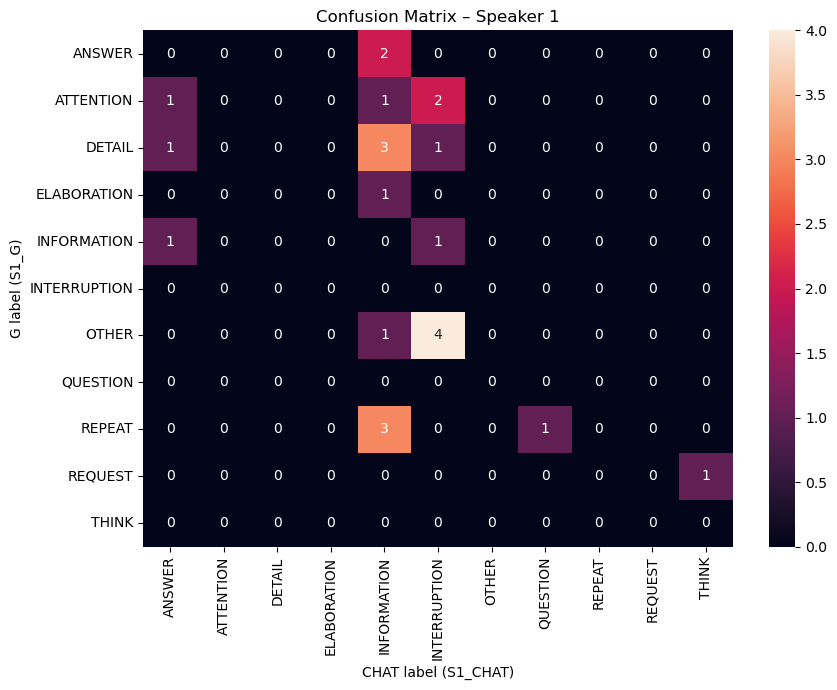

In [92]:
df_S1_G = pd.DataFrame(diff_labels_S1_GvsCHAT)


used_labels_S1_G = sorted(set(df_S1_G["S1_G"]) | set(df_S1_G["S1_CHAT"]))


conf_matrix_S1_G = pd.DataFrame(0, index=used_labels_S1_G, columns=used_labels_S1_G)

for _, row in df_S1_G.iterrows():
    conf_matrix_S1_G.loc[row["S1_G"], row["S1_CHAT"]] += 1

print(conf_matrix_S1_G)

plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix_S1_G, annot=True, fmt="d")
plt.xlabel("CHAT label (S1_CHAT)")
plt.ylabel("G label (S1_G)")
plt.title("Confusion Matrix – Speaker 1")
plt.tight_layout()
plt.show()

In [83]:
#R vs CHAT

rows_for_table_S1_R = []

for e in diff_labels_S1_RvsCHAT:
    u = "\n".join(textwrap.wrap(e["utterance"], width=60))
    rows_for_table_S1_R.append([u, e["S1_R"], e["S1_CHAT"]])

print(tabulate(
    rows_for_table_S1_R,
    headers=["utterance", "S1_R", "S1_CHAT"],
    tablefmt="fancy_grid"
))

╒══════════════════════════════════════════════════════════════╤══════════════╤══════════════╕
│ utterance                                                    │ S1_R         │ S1_CHAT      │
╞══════════════════════════════════════════════════════════════╪══════════════╪══════════════╡
│ [eh]                                                         │ OTHER        │ INTERRUPTION │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ but i'm tryin' to think which memory is (0.6) within five    │ INFORMATION  │ ANSWER       │
│ minutes because they're all short (.) cute moments           │              │              │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ .hhh >°I don't know°< could be about the: (.) the camera cap │ INFORMATION  │ THINK        │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ °do we° just launch into the memo[ry]           

              ANSWER  ATTENTION  DETAIL  ELABORATION  INFORMATION  \
ANSWER             0          0       0            0            2   
ATTENTION          1          0       0            0            1   
DETAIL             1          0       0            0            3   
ELABORATION        0          0       0            0            1   
INFORMATION        2          0       0            0            0   
INTERRUPTION       0          0       0            0            1   
OTHER              0          0       0            0            1   
QUESTION           0          0       0            0            0   
REPEAT             0          0       0            0            3   
THINK              0          0       0            0            0   

              INTERRUPTION  OTHER  QUESTION  REPEAT  THINK  
ANSWER                   0      0         0       0      0  
ATTENTION                2      0         0       0      0  
DETAIL                   1      0         0       0      

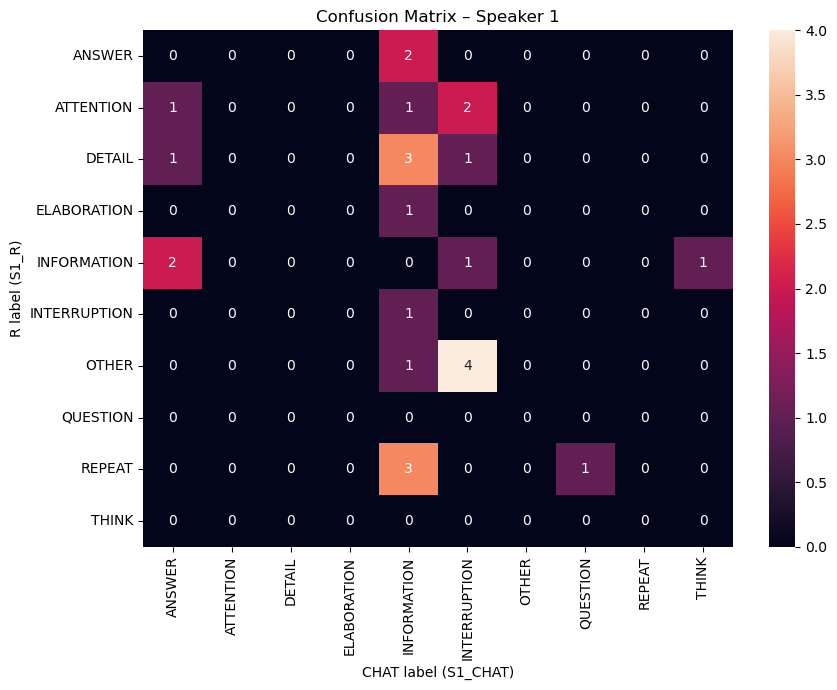

In [94]:
df_S1_R = pd.DataFrame(diff_labels_S1_RvsCHAT)


used_labels_S1_R = sorted(set(df_S1_R["S1_R"]) | set(df_S1_R["S1_CHAT"]))


conf_matrix_S1_R = pd.DataFrame(0, index=used_labels_S1_R, columns=used_labels_S1_R)

for _, row in df_S1_R.iterrows():
    conf_matrix_S1_R.loc[row["S1_R"], row["S1_CHAT"]] += 1

print(conf_matrix_S1_R)

plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix_S1_R, annot=True, fmt="d")
plt.xlabel("CHAT label (S1_CHAT)")
plt.ylabel("R label (S1_R)")
plt.title("Confusion Matrix – Speaker 1")
plt.tight_layout()
plt.show()

## ERROR ANALYSIS FOR SPEAKER 2:
### - G vs R
### - G vs ChatGPT
### - R vs ChatGPT

In [85]:
# ERROR ANALYSIS FOR SPEAKER 2

same_labels_S2 = []
diff_labels_S2 = []

same_labels_S2_GvsCHAT =[]
diff_labels_S2_GvsCHAT = []

same_labels_S2_RvsCHAT =[]
diff_labels_S2_RvsCHAT = []

for item in dicts_s2:
    g = item["S2_G"]
    r = item["S2_R"]
    c = item["S2_CHAT"]
    
    if g == r:
        same_labels_S2.append({
            "utterance": item["utterance"],
            "S2_G": g,
            "S2_R": r
        })
    if g == c:
        same_labels_S2_GvsCHAT.append({
            "utterance": item["utterance"],
            "S2_G": g,
            "S2_CHAT": c
        })
    
    if g != c:
        diff_labels_S2_GvsCHAT.append({
            "utterance": item["utterance"],
            "S2_G": g,
            "S2_CHAT": c
        })
    if r == c:
        same_labels_S2_RvsCHAT.append({
            "utterance": item["utterance"],
            "S2_R": r,
            "S2_CHAT": c
        })
    
    if r != c:
        diff_labels_S2_RvsCHAT.append({
            "utterance": item["utterance"],
            "S2_R": r,
            "S2_CHAT": c
        })

    if g != r:
        diff_labels_S2.append({
            "utterance": item["utterance"],
            "S2_G": g,
            "S2_R": r
        })

print("SAME LABELS S2 - R vs G")
print(same_labels_S2)
print()

print("DIFFERENT LABELS S2 R vs G")
print(diff_labels_S2)
print()

print("SAME LABELS S2 G vs CHAT")
print(same_labels_S2_GvsCHAT)
print()

print("DIFFERENT LABELS S2 G vs CHAT")
print(diff_labels_S2_GvsCHAT)
print()

print("SAME LABELS S2 R vs CHAT")
print(same_labels_S2_RvsCHAT)
print()

print("DIFFERENT LABELS S2 R vs CHAT")
print(diff_labels_S2_RvsCHAT)
print()

SAME LABELS S2 - R vs G
[{'utterance': '[remi]nisce', 'S2_G': 'REPEAT', 'S2_R': 'REPEAT'}, {'utterance': '(a)[bout] a shared memory', 'S2_G': 'ELABORATION', 'S2_R': 'ELABORATION'}, {'utterance': 'which memory would you like', 'S2_G': 'QUESTION', 'S2_R': 'QUESTION'}, {'utterance': 'mh=yea:h', 'S2_G': 'ATTENTION', 'S2_R': 'ATTENTION'}, {'utterance': "°we- we'll probably spend more than five minutes finding a memory°", 'S2_G': 'INFORMATION', 'S2_R': 'INFORMATION'}, {'utterance': 'u[:h]', 'S2_G': 'OTHER', 'S2_R': 'OTHER'}, {'utterance': '°that was a good one°', 'S2_G': 'INFORMATION', 'S2_R': 'INFORMATION'}, {'utterance': '↓°yeah°', 'S2_G': 'ATTENTION', 'S2_R': 'ATTENTION'}, {'utterance': 'yea::h↑', 'S2_G': 'THINK', 'S2_R': 'THINK'}, {'utterance': 'no i like the memory', 'S2_G': 'ANSWER', 'S2_R': 'ANSWER'}, {'utterance': "just tryin' to think of what like (1.4) it means", 'S2_G': 'INFORMATION', 'S2_R': 'INFORMATION'}, {'utterance': '>it was our first trip<', 'S2_G': 'INFORMATION', 'S2_R': '

In [86]:
rows_for_table_S2 = []

for e in diff_labels_S2:
    u = "\n".join(textwrap.wrap(e["utterance"], width=60))
    rows_for_table_S2.append([u, e["S2_G"], e["S2_R"]])

print(tabulate(
    rows_for_table_S2,
    headers=["utterance", "S2_G", "S2_R"],
    tablefmt="fancy_grid"
))

╒═════════════════════════════════════════════════════════════╤══════════════╤═════════════╕
│ utterance                                                   │ S2_G         │ S2_R        │
╞═════════════════════════════════════════════════════════════╪══════════════╪═════════════╡
│ >how do we do this<                                         │ QUESTION     │ NONQUESTION │
├─────────────────────────────────────────────────────────────┼──────────────┼─────────────┤
│ do we just launch into the memory?                          │ QUESTION     │ NONQUESTION │
├─────────────────────────────────────────────────────────────┼──────────────┼─────────────┤
│ [°I (.)] don't know°                                        │ ANSWER       │ THINK       │
├─────────────────────────────────────────────────────────────┼──────────────┼─────────────┤
│ [yeah i] like that memory (.) 'cause that was (0.4) when we │ ANSWER       │ INFORMATION │
│ were tryin' to figure out                                   │       

              ANSWER  INFORMATION  INTERRUPTION  NONQUESTION  OTHER  QUESTION  \
ANSWER             0            3             0            0      0         0   
INFORMATION        0            0             0            0      0         0   
INTERRUPTION       0            0             0            0      1         0   
NONQUESTION        0            1             0            0      0         0   
OTHER              0            0             0            0      0         0   
QUESTION           0            0             0            2      0         0   
THINK              0            0             0            0      2         0   

              THINK  
ANSWER            1  
INFORMATION       0  
INTERRUPTION      0  
NONQUESTION       0  
OTHER             0  
QUESTION          0  
THINK             0  


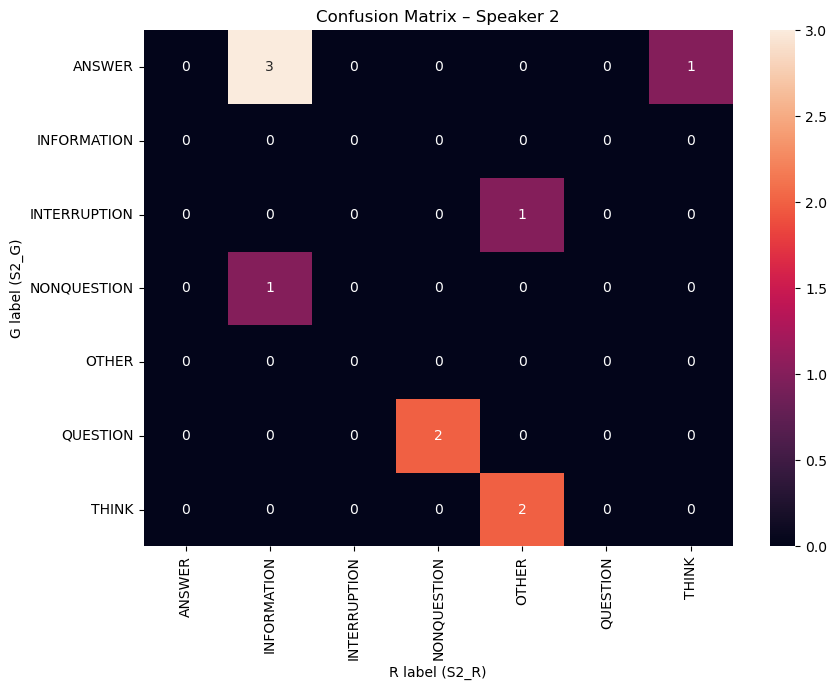

In [96]:
df_S2 = pd.DataFrame(diff_labels_S2)


used_labels_S2 = sorted(set(df_S2["S2_G"]) | set(df_S2["S2_R"]))


conf_matrix_S2 = pd.DataFrame(0, index=used_labels_S2, columns=used_labels_S2)

for _, row in df_S2.iterrows():
    conf_matrix_S2.loc[row["S2_G"], row["S2_R"]] += 1

print(conf_matrix_S2)
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix_S2, annot=True, fmt="d")
plt.xlabel("R label (S2_R)")
plt.ylabel("G label (S2_G)")
plt.title("Confusion Matrix – Speaker 2")
plt.tight_layout()
plt.show()

In [87]:
#G vs CHAT

rows_for_table_S2_G = []

for e in diff_labels_S2_GvsCHAT:
    u = "\n".join(textwrap.wrap(e["utterance"], width=60))
    rows_for_table_S2_G.append([u, e["S2_G"], e["S2_CHAT"]])

print(tabulate(
    rows_for_table_S2_G,
    headers=["utterance", "S2_G", "S2_CHAT"],
    tablefmt="fancy_grid"
))

╒══════════════════════════════════════════════════════════════╤══════════════╤══════════════╕
│ utterance                                                    │ S2_G         │ S2_CHAT      │
╞══════════════════════════════════════════════════════════════╪══════════════╪══════════════╡
│ (a)[bout] a shared memory                                    │ ELABORATION  │ INFORMATION  │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ u[:h]                                                        │ OTHER        │ INTERRUPTION │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ yea::h↑                                                      │ THINK        │ ANSWER       │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ [yeah i] like that memory (.) 'cause that was (0.4) when we  │ ANSWER       │ INFORMATION  │
│ were tryin' to figure out                       

              ANSWER  ATTENTION  ELABORATION  INFORMATION  INTERRUPTION  \
ANSWER             0          0            0            3             0   
ATTENTION          0          0            0            1             3   
ELABORATION        0          0            0            2             0   
INFORMATION        0          0            0            0             1   
INTERRUPTION       0          0            0            1             0   
NONQUESTION        0          0            0            1             0   
OTHER              0          0            1            1             1   
QUESTION           0          0            0            0             0   
REPEAT             0          0            0            9             0   
REQUEST            0          0            0            1             0   
THINK              1          0            1            0             0   

              NONQUESTION  OTHER  QUESTION  REPEAT  REQUEST  THINK  
ANSWER                  0     

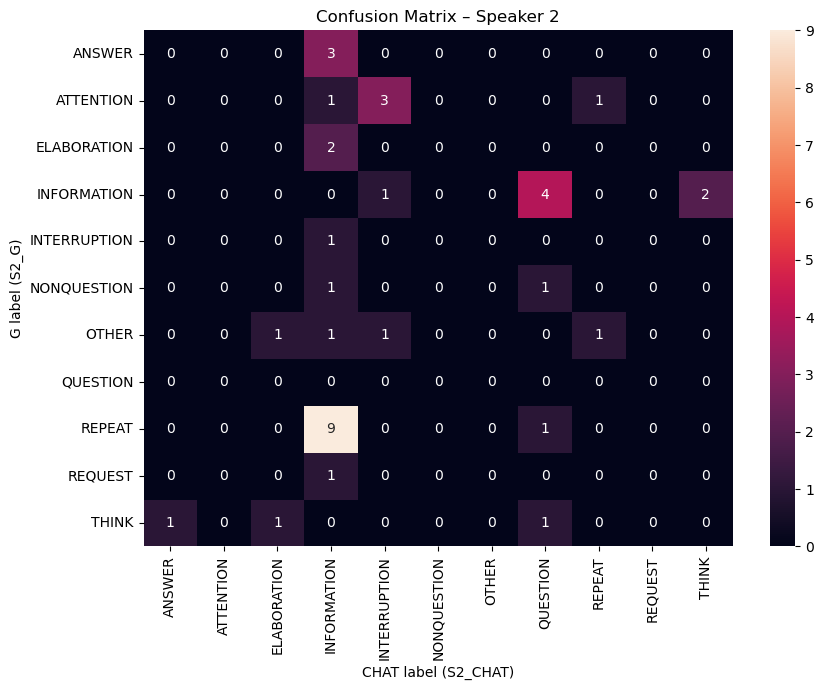

In [97]:
df_S2_G = pd.DataFrame(diff_labels_S2_GvsCHAT)


used_labels_S2_G = sorted(set(df_S2_G["S2_G"]) | set(df_S2_G["S2_CHAT"]))


conf_matrix_S2_G = pd.DataFrame(0, index=used_labels_S2_G, columns=used_labels_S2_G)

for _, row in df_S2_G.iterrows():
    conf_matrix_S2_G.loc[row["S2_G"], row["S2_CHAT"]] += 1

print(conf_matrix_S2_G)
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix_S2_G, annot=True, fmt="d")
plt.xlabel("CHAT label (S2_CHAT)")
plt.ylabel("G label (S2_G)")
plt.title("Confusion Matrix – Speaker 2")
plt.tight_layout()
plt.show()

In [88]:
#R vs CHAT

rows_for_table_S2_R = []

for e in diff_labels_S2_RvsCHAT:
    u = "\n".join(textwrap.wrap(e["utterance"], width=60))
    rows_for_table_S2_R.append([u, e["S2_R"], e["S2_CHAT"]])

print(tabulate(
    rows_for_table_S2_R,
    headers=["utterance", "S2_R", "S2_CHAT"],
    tablefmt="fancy_grid"
))

╒══════════════════════════════════════════════════════════════╤══════════════╤══════════════╕
│ utterance                                                    │ S2_R         │ S2_CHAT      │
╞══════════════════════════════════════════════════════════════╪══════════════╪══════════════╡
│ (a)[bout] a shared memory                                    │ ELABORATION  │ INFORMATION  │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ u[:h]                                                        │ OTHER        │ INTERRUPTION │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ >how do we do this<                                          │ NONQUESTION  │ QUESTION     │
├──────────────────────────────────────────────────────────────┼──────────────┼──────────────┤
│ do we just launch into the memory?                           │ NONQUESTION  │ QUESTION     │
├─────────────────────────────────────────────────

              ANSWER  ATTENTION  ELABORATION  INFORMATION  INTERRUPTION  \
ANSWER             0          0            0            0             0   
ATTENTION          0          0            0            1             3   
ELABORATION        0          0            0            2             0   
INFORMATION        0          0            0            0             1   
INTERRUPTION       0          0            0            1             0   
NONQUESTION        0          0            0            0             0   
OTHER              0          0            2            1             2   
QUESTION           0          0            0            0             0   
REPEAT             0          0            0            9             0   
REQUEST            0          0            0            1             0   
THINK              2          0            0            0             0   

              NONQUESTION  OTHER  QUESTION  REPEAT  REQUEST  THINK  
ANSWER                  0     

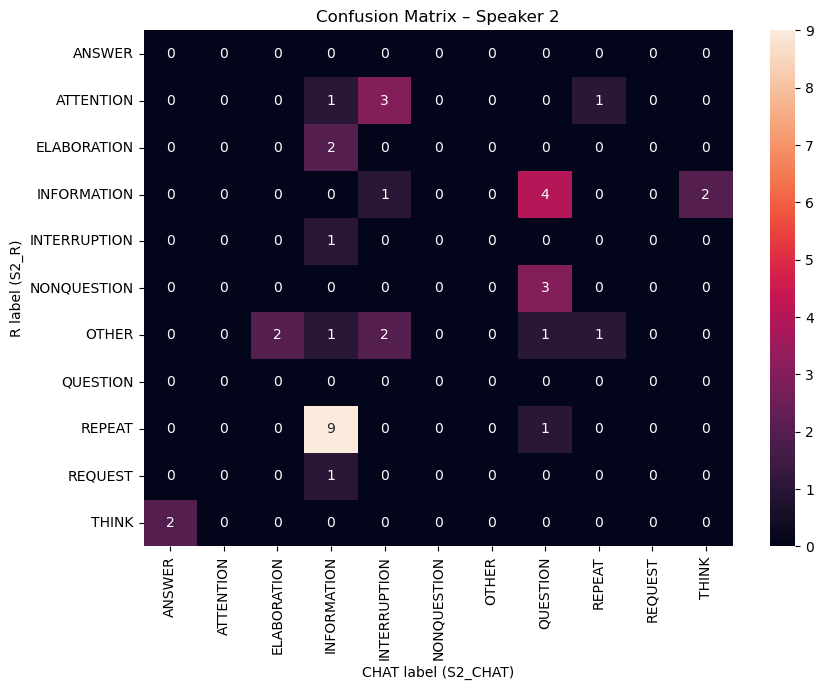

In [99]:
df_S2_R = pd.DataFrame(diff_labels_S2_RvsCHAT)


used_labels_S2_R = sorted(set(df_S2_R["S2_R"]) | set(df_S2_R["S2_CHAT"]))


conf_matrix_S2_R = pd.DataFrame(0, index=used_labels_S2_R, columns=used_labels_S2_R)

for _, row in df_S2_R.iterrows():
    conf_matrix_S2_R.loc[row["S2_R"], row["S2_CHAT"]] += 1

print(conf_matrix_S2_R)
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix_S2_R, annot=True, fmt="d")
plt.xlabel("CHAT label (S2_CHAT)")
plt.ylabel("R label (S2_R)")
plt.title("Confusion Matrix – Speaker 2")
plt.tight_layout()
plt.show()

# Label analysis
## - my conversation
## - Rita's conversation
## - Gianmarco's conversation


In [26]:
df_conv2 = pd.read_csv("conv2.tsv", sep="\t")
df_conv2.head()

,Begin Time - hh:mm:ss.ms,End Time - hh:mm:ss.ms,Duration - hh:mm:ss.ms,E,R,NEWANN_1,NEWANN_2
0,00:00:00.710,00:00:05.718,00:00:05.008,No we-we didn't make it up (.) i-i- (.) it alr...,NaN,INFORMATION,NaN
1,00:00:03.876,00:00:04.753,00:00:00.877,NaN,yeah:: i think so,NaN,ATTENTION
2,00:00:05.597,00:00:06.845,00:00:01.248,NaN,hhh hhh,NaN,OTHER
3,00:00:06.723,00:00:09.835,00:00:03.112,heh yea(h)h .hhh they compare it to Ibiza but ...,NaN,INFORMATION,NaN
4,00:00:09.871,00:00:11.376,00:00:01.505,NaN,"'t's nothing like it but,",NaN,INFORMATION


In [ ]:
Counter(df_conv2["NEWANN_1"]) #> E

Counter({nan: 54,
         'INFORMATION': 23,
         'ATTENTION': 14,
         'REPEAT': 7,
         'NONQUESTION': 3,
         'OTHER': 2,
         'QUESTION': 2,
         'THINK': 1,
         'ANSWER': 1,
         'DETAIL': 1})

In [ ]:
Counter(df_conv2["NEWANN_2"]) #> R

Counter({nan: 54,
         'INFORMATION': 26,
         'OTHER': 9,
         'ATTENTION': 7,
         'DETAIL': 7,
         'REPEAT': 3,
         'QUESTION': 1,
         'ANSWER': 1})

In [30]:
df_conv3 = pd.read_csv("conv3.tsv", sep="\t")
df_conv3.head()

,Begin Time - hh:mm:ss.ms,End Time - hh:mm:ss.ms,Duration - hh:mm:ss.ms,ellen,gianmarco,ANN_E,ANN_G
0,00:00:01.900,00:00:04.920,00:00:03.020,NaN,ho- >wh- like< (.) what was the weather (.) wh...,NaN,QUESTION
1,00:00:06.190,00:00:06.800,00:00:00.610,NaN,that day,NaN,ELABORATION
2,00:00:07.080,00:00:07.910,00:00:00.830,NaN,do you remember?,NaN,QUESTION
3,00:00:08.420,00:00:09.150,00:00:00.730,in copenhag[en?],NaN,QUESTION,NaN
4,00:00:09.020,00:00:09.950,00:00:00.930,NaN,[in] copenhagen yes,NaN,REPEAT


In [32]:
Counter(df_conv3["ANN_E"])

Counter({nan: 51,
         'INFORMATION': 14,
         'ATTENTION': 9,
         'ANSWER': 6,
         'QUESTION': 4,
         'ELABORATION': 4,
         'OTHER': 1,
         'INTERRUPTION': 1,
         'REPEAT': 1})

In [33]:
Counter(df_conv3["ANN_G"])

Counter({nan: 40,
         'INFORMATION': 22,
         'ATTENTION': 11,
         'QUESTION': 8,
         'OTHER': 3,
         'ELABORATION': 2,
         'ANSWER': 2,
         'REPEAT': 1,
         'INTERRUPTION': 1,
         'NONQUESTION': 1})

In [76]:
Counter(df_MAIN['GOLD_S1'])

Counter({nan: 116,
         'INFORMATION': 26,
         'REPEAT': 11,
         'OTHER': 9,
         'ATTENTION': 9,
         'INTERRUPTION': 7,
         'DETAIL': 6,
         'ANSWER': 4,
         'THINK': 2,
         'QUESTION': 2,
         'ELABORATION': 2,
         'REQUEST': 1})

In [77]:
Counter(df_MAIN['GOLD_S2'])

Counter({nan: 79,
         'INFORMATION': 50,
         'ATTENTION': 21,
         'OTHER': 12,
         'REPEAT': 11,
         'ANSWER': 5,
         'QUESTION': 4,
         'THINK': 4,
         'INTERRUPTION': 4,
         'ELABORATION': 2,
         'NONQUESTION': 2,
         'REQUEST': 1})